In [4]:
%matplotlib widget

In [1]:
import nrrd
import numpy as np
from skimage.metrics import structural_similarity as compare_ssim

# Load the NRRD volumes
volume1, _ = nrrd.read(r'/home/jericho/Documents/45_registered.nrrd')
volume2, _ = nrrd.read(r'/home/jericho/Documents/52_registered.nrrd')
volume3, _ = nrrd.read(r'/home/jericho/Documents/57_registered.nrrd')
volume4, _ = nrrd.read(r'/home/jericho/Documents/66_registered.nrrd')

In [7]:
volume1.shape, volume2.shape, volume3.shape, volume4.shape

((512, 512, 931), (512, 512, 931), (512, 512, 931), (512, 512, 931))

In [28]:
plt.close('all')

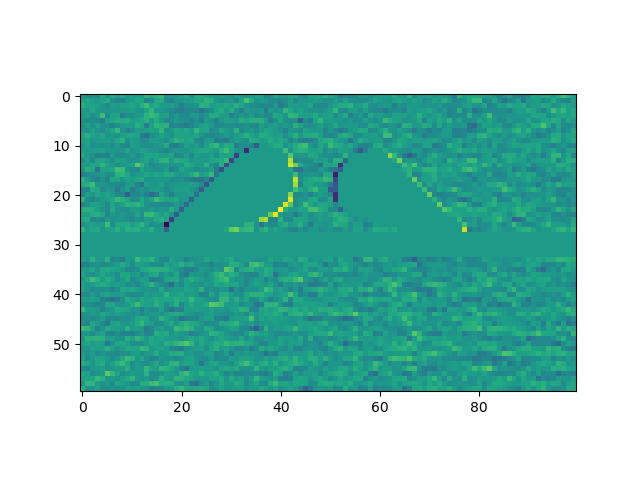

In [86]:
import matplotlib.pyplot as plt
import mpl_interactions as pli

# CT_4_temp = volume4.T[300:441, 170:290, 210:310]

# CT_4 = (CT_4_temp[::3] + CT_4_temp[1::3]  + CT_4_temp[2::3]) /3
# CT_42 = (CT_4[:,::2]+ CT_4[:,1::2])/2
# Create the figure and the line that we will manipulate
plt.figure()
pli.hyperslicer(CT_4 - CT_3)



In [87]:
CT_1 = volume1.T[300:441, 170:290, 210:310] + 1000
CT_1 = (CT_1[::3] + CT_1[1::3]  + CT_1[2::3]) /3
CT_1 = (CT_1[:,::2] + CT_1[:,1::2]) /2

CT_2 = volume2.T[300:441, 170:290, 210:310] + 1000
CT_2 = (CT_2[::3] + CT_2[1::3]  + CT_2[2::3]) /3
CT_2 = (CT_2[:,::2] + CT_2[:,1::2]) /2

CT_3 = volume3.T[300:441, 170:290, 210:310] + 1000
CT_3 = (CT_3[::3] + CT_3[1::3]  + CT_3[2::3]) /3
CT_3 = (CT_3[:,::2] + CT_3[:,1::2]) /2

CT_4 = volume4.T[300:441, 170:290, 210:310] + 1000
CT_4 = (CT_4[::3] + CT_4[1::3]  + CT_4[2::3]) /3
CT_4 = (CT_4[:,::2] + CT_4[:,1::2]) /2

CT_1[:,28:33] = 1000
CT_2[:,28:33] = 1000
CT_3[:,28:33] = 1000
CT_4[:,28:33] = 1000

# Clip the values to the range 0-2000
thresh = 1500
thresh_low = 0

CT_1[CT_1 < thresh_low] = thresh_low
CT_1[CT_1 > thresh] = thresh

CT_2[CT_2 < thresh_low] = thresh_low
CT_2[CT_2 > thresh] = thresh

CT_3[CT_3 < thresh_low] = thresh_low
CT_3[CT_3 > thresh] = thresh

CT_4[CT_4 < thresh_low] = thresh_low
CT_4[CT_4 > thresh] = thresh

# Compute the SSIM for the segmentation structure in the images
ssim1 = compare_ssim(CT_4, CT_2,gaussian_weights=True, sigma=1.5, use_sample_covariance=False, data_range=thresh)
ssim2 = compare_ssim(CT_4, CT_3,gaussian_weights=True, sigma=1.5, use_sample_covariance=False, data_range=thresh)
ssim3 = compare_ssim(CT_4, CT_1,gaussian_weights=True, sigma=1.5, use_sample_covariance=False, data_range=thresh)

print(f'SSIM for volume1: {ssim1}')
print(f'SSIM for volume2: {ssim2}')
print(f'SSIM for volume3: {ssim3}')

# print the rmse of the images
print(np.sqrt(np.mean((CT_4 - CT_2)**2)))
print(np.sqrt(np.mean((CT_4 - CT_3)**2)))
print(np.sqrt(np.mean((CT_4 - CT_1)**2)))

SSIM for volume1: 0.5817883098609364
SSIM for volume2: 0.6868274466326987
SSIM for volume3: 0.6430778156097979
68.19319815102043
62.20564364250349
64.37328653027281
